<a href="https://colab.research.google.com/github/kavyashree-205/SUPER-MARKET-ANALYSIS/blob/main/SAMPLE_SUPER_STORE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE MAIN OBJECTIVE OF THE EXPLORATORY ANALYSIS IS TO INCREASE THE GROWTH OF THE SUPER STORES'S PROFIT**
# This can be achieved by
- *Highlighting the attributes which provide most profit to the superstore*
- *Concentrating on the area which provide least profit to engage improvement.*

# **Importing Libraries for Exploratory Data Analysis**
- **Numpy**
- **Pandas**
- **Matplotlib**
- **Seaborn** 
- **Plotly** **Express**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df=pd.read_csv("SampleSuperstore.csv")

# **Understanding the dataset Sample Superstore**
- **Know the field names**
- **The shape of the dataset**
- **The unique values present in the dataset**
- **Datatype of each column**
- **The 5 summary values of numerical variables(max,min,standard deviation..etc)**

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.shape

(9994, 13)

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [10]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# **Cleaning the data**
- **To check whether null values are present in the dataset**
- **Dropping off the columns which are not necessary for data analysis**
- **Checking for outliers using Z SCORE  and removing them from the dataset**


In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#for data analysis we dont need postal code column and country as the data belongs to only USA
df1=df.drop(["Country","Postal Code"],axis=1)
df1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
#Checking for outliers
from scipy import stats
z=np.abs(stats.zscore(df1["Sales"]))
print(np.where(z>3))

(array([  27,  165,  251,  262,  263,  318,  353,  399,  487,  509,  515,
        683,  977,  994, 1001, 1085, 1155, 1246, 1438, 1454, 1644, 1791,
       1803, 1805, 2182, 2418, 2492, 2505, 2567, 2623, 2624, 2697, 2848,
       3011, 3055, 3070, 3273, 3280, 3443, 3569, 3580, 3983, 3986, 4093,
       4098, 4128, 4190, 4218, 4277, 4297, 4619, 4865, 4881, 5006, 5126,
       5170, 5198, 5300, 5320, 5530, 5562, 5626, 5710, 5884, 5917, 5990,
       6010, 6014, 6099, 6101, 6116, 6209, 6340, 6425, 6520, 6534, 6535,
       6620, 6626, 6817, 6826, 6868, 6884, 6901, 7173, 7243, 7280, 7474,
       7487, 7579, 7583, 7666, 7683, 7772, 7818, 7914, 7937, 8100, 8102,
       8153, 8204, 8236, 8271, 8312, 8424, 8468, 8488, 8680, 8699, 8749,
       8858, 8892, 8990, 9039, 9056, 9165, 9270, 9412, 9425, 9639, 9649,
       9660, 9741, 9774, 9857, 9929, 9948]),)


In [15]:
z1=np.abs(stats.zscore(df1["Profit"]))
print(np.where(z1>3))

(array([  27,  165,  215,  318,  353,  463,  509,  515,  683,  869,  910,
        994, 1001, 1085, 1199, 1369, 1454, 1644, 1803, 1896, 1995, 2182,
       2492, 2623, 2628, 2697, 2846, 2848, 2928, 3011, 3055, 3070, 3151,
       3273, 3295, 3324, 3566, 3570, 3983, 4093, 4098, 4128, 4190, 4277,
       4355, 4619, 4639, 4820, 4860, 4991, 5006, 5126, 5198, 5310, 5320,
       5530, 5562, 5710, 5990, 6048, 6209, 6262, 6340, 6425, 6520, 6527,
       6626, 6639, 6817, 6826, 6884, 6901, 7280, 7474, 7579, 7583, 7641,
       7666, 7679, 7683, 7772, 7818, 7898, 7914, 8153, 8204, 8208, 8312,
       8488, 8632, 8640, 8749, 8858, 8890, 8990, 8993, 9033, 9039, 9231,
       9270, 9273, 9615, 9639, 9741, 9774, 9929, 9948]),)


In [16]:
z2=np.abs(stats.zscore(df["Discount"]))
print(np.where(z>3))


(array([  27,  165,  251,  262,  263,  318,  353,  399,  487,  509,  515,
        683,  977,  994, 1001, 1085, 1155, 1246, 1438, 1454, 1644, 1791,
       1803, 1805, 2182, 2418, 2492, 2505, 2567, 2623, 2624, 2697, 2848,
       3011, 3055, 3070, 3273, 3280, 3443, 3569, 3580, 3983, 3986, 4093,
       4098, 4128, 4190, 4218, 4277, 4297, 4619, 4865, 4881, 5006, 5126,
       5170, 5198, 5300, 5320, 5530, 5562, 5626, 5710, 5884, 5917, 5990,
       6010, 6014, 6099, 6101, 6116, 6209, 6340, 6425, 6520, 6534, 6535,
       6620, 6626, 6817, 6826, 6868, 6884, 6901, 7173, 7243, 7280, 7474,
       7487, 7579, 7583, 7666, 7683, 7772, 7818, 7914, 7937, 8100, 8102,
       8153, 8204, 8236, 8271, 8312, 8424, 8468, 8488, 8680, 8699, 8749,
       8858, 8892, 8990, 9039, 9056, 9165, 9270, 9412, 9425, 9639, 9649,
       9660, 9741, 9774, 9857, 9929, 9948]),)


In [17]:
df1=df1[z<3]
df1.shape

(9867, 11)

In [18]:
df.shape

(9994, 13)

# Relationship Analysis
- **Heat Map for knowing the overral magnitude of the phenomenon**
- **Pair Plot is for producing a matrix of relationships between each variable in the data for an instant examination of our dataset**


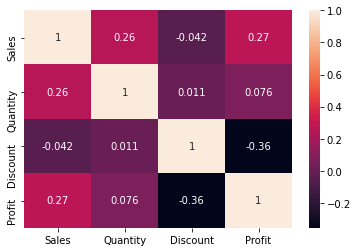

In [19]:
figure_1=df1.corr()
sns.heatmap(figure_1,annot=True)

<Figure size 1440x720 with 0 Axes>

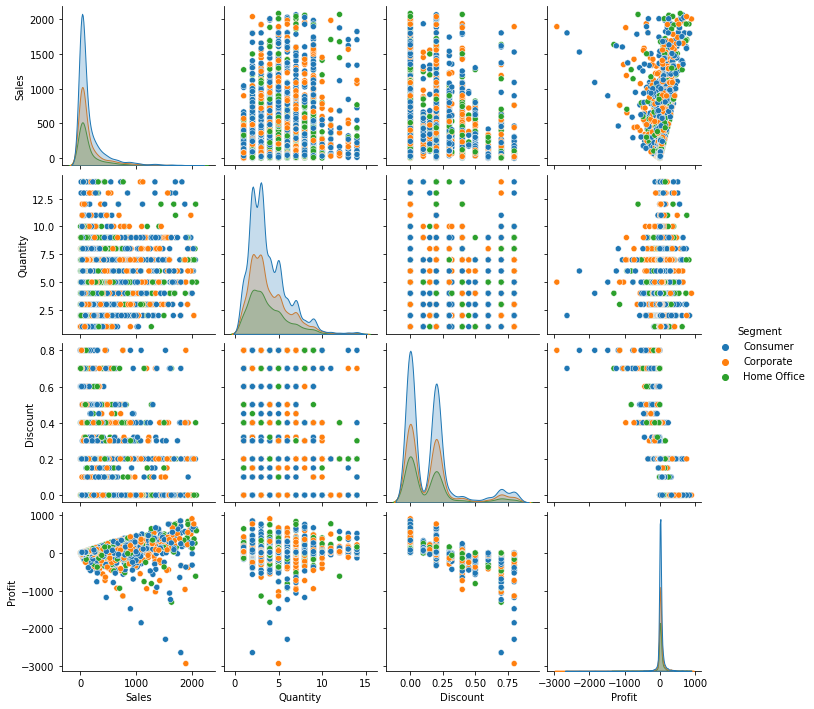

In [20]:
figure_0=plt.figure(figsize=(20,10))
sns.pairplot(df1,hue="Segment")
plt.show()

# **Exploratory analysis of the Sample Superstore Dataset**
- **Histogram**
- **Scatter plot**
- **Bar chart**
- **Density plot**
- **Box plot**
- **Multiple line chart**

# **Histograms** : 
 A Histogram displays the shape and spread of continuous sample data.
  It diaplays distribution and hence histograms can only plot 1 numeric data.

# **TO VISUALIZE THE SHAPE AND SPREAD OF SALES COLUMN**
From the histogram we can say that
- It is a right skewed graph
- MEAN>MEDIAN>MODE

In [21]:
# to calculate the mean,median,mode
mean_sales=np.mean(df1['Sales'])
print("THE MEAN : ",mean_sales)
median_sales=df1['Sales'].median()
print("THE MEDIAN : ",median_sales)
mode_sales=df1['Sales'].mode()
print("THE MODE : ",mode_sales)

THE MEAN :  180.55823053612622
THE MEDIAN :  52.096000000000004
THE MODE :  0    12.96
dtype: float64


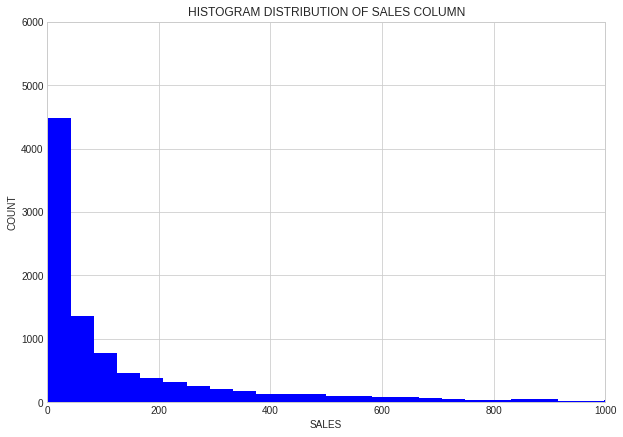

In [22]:
#to understand the distribution of values of a particular field/attribute we use histogram 
#we are goin to see the distribution of Sales
figure_2=plt.figure(figsize=(10,7))
plt.style.use("seaborn-whitegrid") 
ax=plt.axis([0,1000,0,6000])
plt.hist(x=df1['Sales'],color="blue",bins=50)
plt.title("HISTOGRAM DISTRIBUTION OF SALES COLUMN")
plt.xlabel('SALES')
plt.ylabel("COUNT")
plt.show()


# **TO VISUALIZE THE SHAPE AND SPREAD OF PROFIT COLUMN**
From the histogram we can infer that
- There is no much spread in the data (less variance)
- The values are concentrated around the mean of the data

In [23]:
# to calculate the variance and standard deviation
deviation_profit=df1['Profit'].std()
print("THE STANDARD DEVIATION : ",deviation_profit)
variance_profit=df1['Profit'].var()
print("THE VARIANCE : ",variance_profit)
mean_profit=df1['Profit'].mean()
print("MEAN OF PROFIT COLUMN : ",mean_profit)



THE STANDARD DEVIATION :  111.05027414898612
THE VARIANCE :  12332.163388564975
MEAN OF PROFIT COLUMN :  19.401503587716654


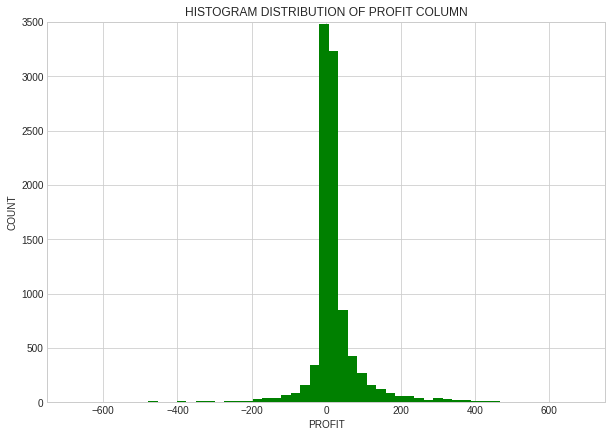

In [24]:
figure_3=plt.figure(figsize=(10,7))
plt.style.use("seaborn-whitegrid")
ax=plt.axis([-750,750,0,5000])
plt.hist(x=df1['Profit'],color="green",bins=150)
plt.title("HISTOGRAM DISTRIBUTION OF PROFIT COLUMN")
plt.ylim(0,3500)
plt.xlabel("PROFIT")
plt.ylabel('COUNT')
plt.show()

# **SCATTER PLOT :**
Scatter plot is used to observe the relationship between the variables,we can also find the strength of the relation by finding the correlation coefficiant.

# **SCATTER PLOT OF SALES Vs PROFIT**
From the graph we can infer that
- The relationship between sales and profit is linearly positive
- But the slope indicates the linear relation is not effective
- From the correlation coefficient (>0) indicates positively  linear but the relation is not strong enough.

In [25]:
#Finding the correlation coefficient to diaplay the strength of the relation between profit and sales
#creating a new dataframe
df_p_s=pd.DataFrame(df1,columns=['Sales','Profit'])
a=df_p_s.corr(method='pearson')
print(a)

          Sales   Profit
Sales   1.00000  0.27166
Profit  0.27166  1.00000


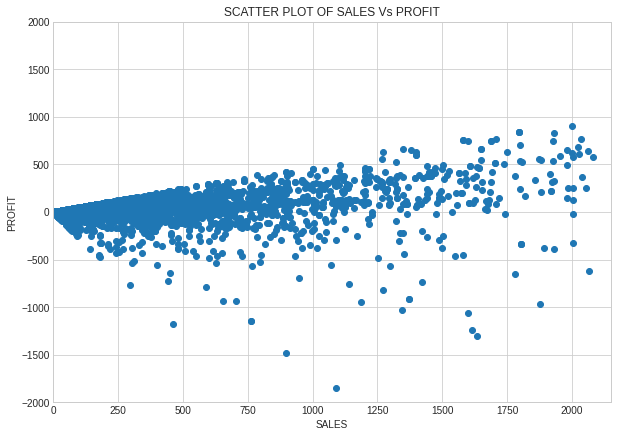

In [26]:
#correlation of sales and profit
#a scatter plot to check the dependency of sales and profit columns
figure=plt.figure(figsize=(10,7))
plt.style.use("seaborn-whitegrid")
ax=plt.axis([0,2150,-2000,2000])
x=df1['Sales']
y=df1['Profit']
plt.scatter(x,y)
plt.xlabel("SALES")
plt.ylabel("PROFIT")
plt.title("SCATTER PLOT OF SALES Vs PROFIT")
plt.show()

# **BAR PLOT :**
 Bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle 
 

# **Which sub-category produces the highest sales or profit?(profit and salesare positively linear)**
STORAGE produces the highest sales or profit
# **Which sub-category produces the least sales or profit?**
FASTENERS produces the least sales or profit


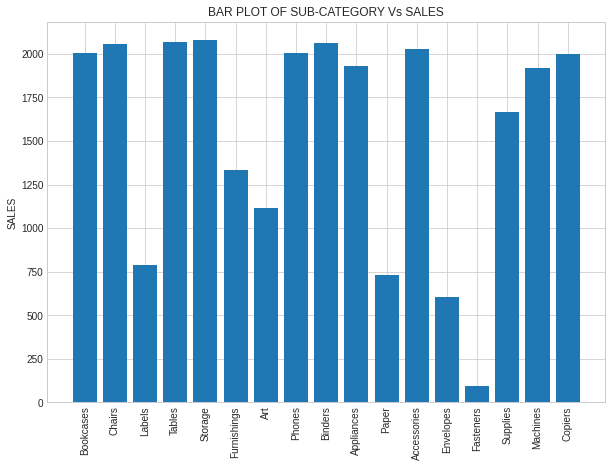

In [27]:
# scatter plot explains the relation between two numeric quantity 
# The variables can be linearly dependent or constant or non linearly dependent
figure_4=plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
x=df1['Sub-Category']
plt.xticks(rotation=90)
y=df1['Sales']
plt.title("BAR PLOT OF SUB-CATEGORY Vs SALES")
plt.ylabel('SALES')
plt.bar(x,y)
plt.show()
                                              

# **BOX PLOT :**
 Boxplot is a standardized way of displaying the distribution of data based on a five number summary basis
# **Box plot indicates**
 - The minimum and maximum value 
 - The interquartile range
 - Outliers
 - Median
 - Complete range.

#**Which category gives more profit and least loss?**
TECHNOLOGY gives more profit as the maximum value goes beyond 500 and we can clearly see from the graph that the loss is very less.
# **Which category gives the maximum loss value?**
Office supplies gives the maximum loss value as the minimum value extends beyind 75%


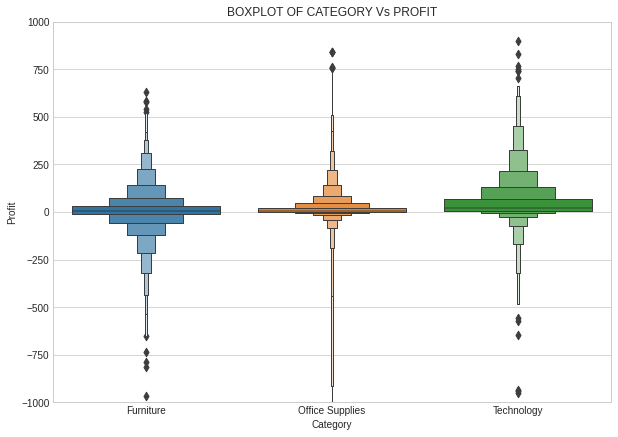

In [28]:
figure_6=plt.figure(figsize=(10,7))
plt.style.use("seaborn-whitegrid")
plt.ylim(-1000,1000)
sns.boxenplot(x='Category',y='Profit',data=df1);
plt.title("BOXPLOT OF CATEGORY Vs PROFIT")
plt.show()

# **BAR PLOT OF STATES OF AMERICA Vs PROFIT**

# **Which State of America gives the maximum profit?**
From the graph we can say that Rhode island is giving the maximum profit
# **Which state gives maximum loss ?**
Illinois is giving the maximum loss to the super market.

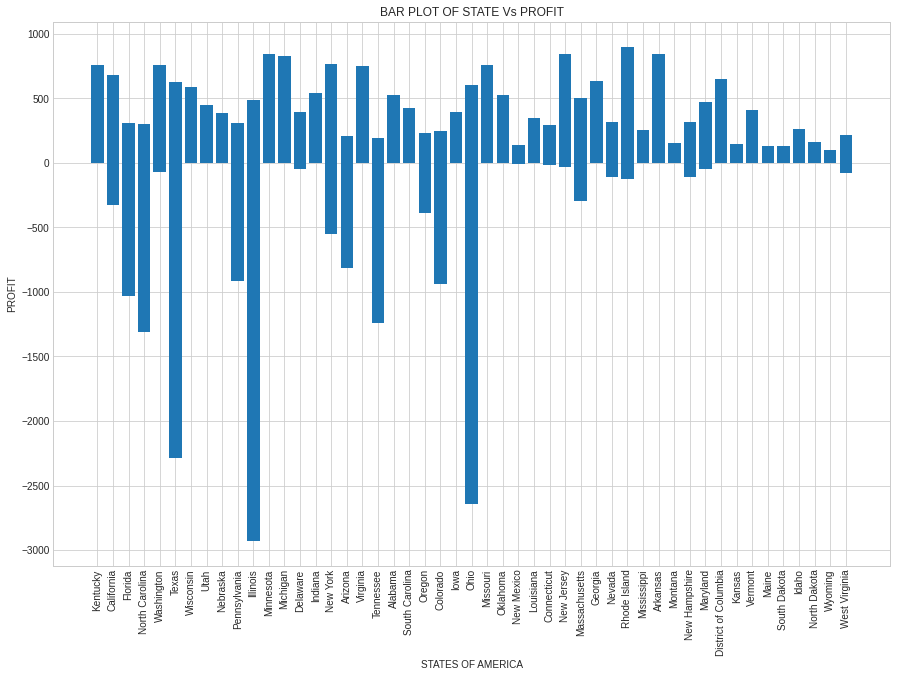

In [29]:
#plotting a bar graph to show the plot between profit and states of america
figure_7=plt.figure(figsize=(15,10))
x=df1['State']
y=df1['Profit']
plt.bar(x,y)
plt.title("BAR PLOT OF STATE Vs PROFIT")
plt.xlabel("STATES OF AMERICA")
plt.xticks(rotation=90)
plt.ylabel("PROFIT")
plt.show()

# **INTERACTIVE HISTOGRAM OF PROFIT DISTRIBUTION ALONG VARIOUS SEGMENTS**

# **Which segment provides more profit?**
From the histogram we can conclude that Home Office gives more profit to the super market


In [30]:
#histogram to show profit column distribution of various segments
import plotly.express as px
fig = px.histogram(df1, x="Profit",color="Segment",
                   marginal="box",hover_data=df1.columns)
fig.show() 

# **DENSITY PLOT OF SALES Vs REGIONS(NORTH,SOUTH,EAST,WEST)**

# **DENSITY PLOT :**
 It is a smoothed version of the histogram and is used in the same concept.


From the graph we can infer that
- The southern region of USA commits more profit to the super market
- The eastern part of USA gives least profit to the super market.

<Figure size 1080x720 with 0 Axes>

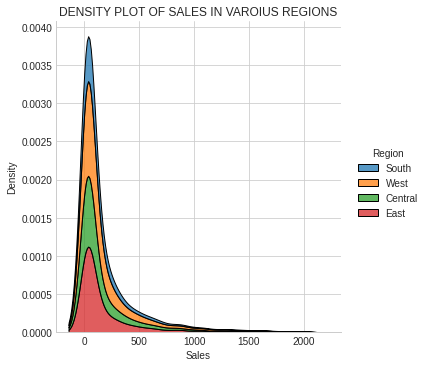

In [31]:
#visualizing sales and region using the density plot by seaborn
figure_8=plt.figure(figsize=(15,10))
sns.displot(df1, x="Sales", hue="Region", kind="kde",multiple="stack")
plt.title("DENSITY PLOT OF SALES IN VAROIUS REGIONS")
plt.show()

# **HISTOGRAM OF SALES IN VARIOUS SHIP MODES**

<Figure size 720x504 with 0 Axes>

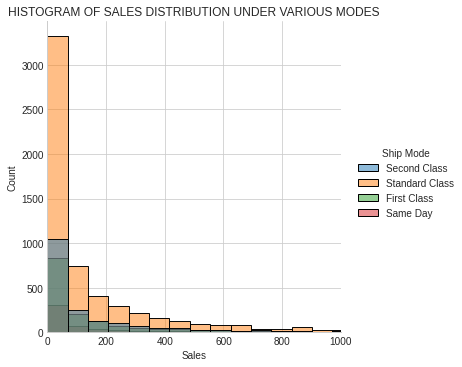

In [32]:
#visualizing a plot of the sales distribution under various ship modes
figure_9=plt.figure(figsize=(10,7))
sns.displot(df1, x="Sales", hue="Ship Mode",bins=30)
plt.xlim(0,1000)
plt.title("HISTOGRAM OF SALES DISTRIBUTION UNDER VARIOUS MODES")
plt.show()

# **GROUPED BAR CHART**
Grouped bar charts are Bar charts in which multiple sets of data items are compared, with a single color used to denote a specific series across all sets. 

<Figure size 1440x720 with 0 Axes>

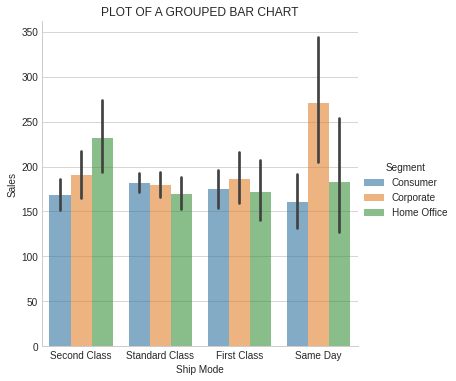

In [33]:
#visualizing which  segment produces more sales
figure_10=plt.figure(figsize=(20,10))
plt.style.use("seaborn-whitegrid")
g = sns.catplot(data=df1, kind="bar",x="Ship Mode", y="Sales", hue="Segment", alpha=.6)
plt.title("PLOT OF A GROUPED BAR CHART")
plt.show()

# **MULTIPLE LINE CHARTS**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



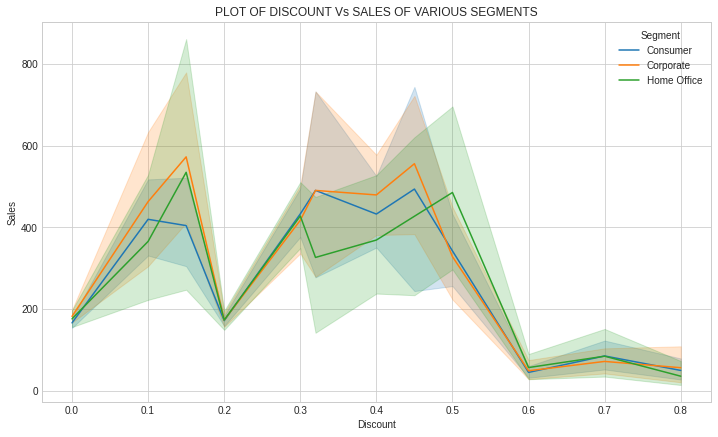

In [34]:
# line plot visualization state vs discount
figure_11=plt.figure(figsize=(12,7))
sns.lineplot('Discount','Sales',data=df1, hue="Segment");
plt.title("PLOT OF DISCOUNT Vs SALES OF VARIOUS SEGMENTS")
plt.show() 

# **TASK 1 COMPLETED**